<a href="https://colab.research.google.com/github/stenoe/FEDS/blob/main/notebooks/LectureNotebooks/FEDS_lecture_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

First, the bare truth: **MACHINES DO NOT LEARN!**



## 1 Load our data from github

You can use the same code as in the last lecture :)

In [56]:
import requests
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")

# If the data folder doesn't exist, download it and prepare it...
if data_path.is_dir():
  print(f"{data_path} directory already exists... skipping creation")
else: 
  print(f"{data_path} does not exist, creating one...")
  data_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "music.csv", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/stenoe/FEDS/main/data/music.csv")
  print("Downloading data...")
  f.write(request.content)

data directory already exists... skipping creation


## 2 Let's train the computer to make decisions

In this very simple example **we learn** how to let the computer make a decision based on some features of data.

We want to use the `sklearn.DecisionTreeClassifier` and therefore we need to split our data into a training and testing data set using `train_test_split` from the `sklearn.model_selection`. To assess how well we can predict something, we also use the
`accuracy_score` from the `sklearn.metrics` package.


**Acknowledgements**

This example was modified from a [video](https://www.youtube.com/watch?v=7eh4d6sabA0) in youtube 
(thanks to Mosh Hamedani, codewithmosh.com) and from the `sklearn` documentation.


### 2.1 The music recommender

We have a data set of music genres linked with age and gender. 

In [57]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

let's load the data and have some overview

In [58]:
df = pd.read_csv("data/music.csv")
df.shape

(18, 3)

In [59]:
df

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


### 2.2 Split the data into features and labels

The age and gender are our features and then music genre is our label.

In [60]:
X = df.drop(columns=['genre']).values
y = df['genre'].values

In [61]:
y

array(['HipHop', 'HipHop', 'HipHop', 'Jazz', 'Jazz', 'Jazz', 'Classical',
       'Classical', 'Classical', 'Dance', 'Dance', 'Dance', 'Acoustic',
       'Acoustic', 'Acoustic', 'Classical', 'Classical', 'Classical'],
      dtype=object)

### 2.3 We fit the whole dataset!

**NOTE:** I do not split yet into training and testing data!  

In [62]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

### 2.4 Now we predict for features that are not inside the data

I use a 21 year old male and a 22 year old female (not in the data) to see what the recommder would give them as most probable music genre they night like.

In [63]:
predictions = model.predict([[21, 1], [22, 0]])
predictions

array(['HipHop', 'Dance'], dtype=object)

## 3 Check the accuracy of the predictions

### 3.1 Now let's use the train and test data splitting

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [65]:
X_train

array([[30,  1],
       [31,  0],
       [34,  0],
       [30,  0],
       [26,  1],
       [20,  0],
       [31,  1],
       [26,  0],
       [37,  1],
       [23,  1],
       [20,  1],
       [25,  1],
       [29,  1],
       [25,  0]])

### 3.2 Fit the training data to the model

In [66]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

### 3.3 Make predictions and get the accuracy

In [67]:
predictions2 = model.predict(X_test)
score = accuracy_score(y_test, predictions2)
score

1.0

Because we use a small dataset, the score may be 1, like perfect match or as small as 0.2 or so. This comes from the fact that we use a tiny dataset and usually that methods are run on really large data. 

Let's test what happens if we run the model many times. The train_test_split() function picks randomly data!

In [68]:
scores = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    print(scores[i])

print(f"\naverage score: {np.mean(scores)}")

0.75
1.0
1.0
1.0
1.0
0.75
1.0
0.75
1.0
0.5
1.0
0.75
1.0
0.5
0.75
0.75
0.75
1.0
1.0
0.5

average score: 0.8375


And now let's see what happens if we change the fraction between the training and testing from 80:20 % to the oppsosite!

In [69]:
scores = []

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, pred))
    print(scores[i])

print(f"\naverage score: {np.round(np.mean(scores),2)}")

0.5333333333333333
0.2
0.2
0.13333333333333333
0.4
0.4
0.4
0.2
0.4666666666666667
0.2
0.2
0.2
0.13333333333333333
0.4
0.4
0.2
0.4
0.4
0.4
0.4

average score: 0.31


## 4 Visualise the decision tree

In [70]:
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [71]:
# ensure that the model is with a trainig:test with 80:20 % to have a reasonable large graph
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # test_size=0.8 makes a small graph!
model.fit(X_train, y_train)

dot_data = tree.export_graphviz(model, 
                                out_file=None, 
                                feature_names=["age", "gender"],
                                class_names=sorted(np.unique(y).tolist()),
                                filled=True, 
                                rounded=True,
                                special_characters=True
                               )

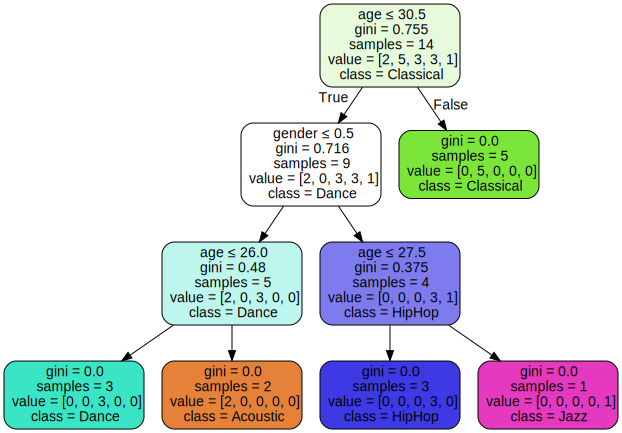

In [72]:
graph = graphviz.Source(dot_data)
graph

## 5 Save a trained model to reuse it

Python has the `joblib` package that can be used to make python objects persistent and save them to some storage place. The package itself is a lightweight pipelining tool.

### 5.1 The complete saving a model example

Here, the complete code to save a model is shown. The workflow is:

1. Reading the data
2. Create the feature and label tensors
3. Define the model
4. Fit the model to the data (here all, usually train and test)
5. save the model object to disk

In [73]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import joblib

df = pd.read_csv("data/music.csv")
X = df.drop(columns=["genre"]).values
y = df["genre"].values

model = DecisionTreeClassifier()
model.fit(X, y)

joblib.dump(model, "music-recommender.joblib")

['music-recommender.joblib']

## 6 Load a saved model


### 6.1 The complete code for loading a model and make predictions

The complete code is shown, the workflow is:

1. Reading the model
2. Making predictions

In [74]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import joblib

model = joblib.load("music-recommender.joblib")

predictions = model.predict([[27, 1], [22, 0]])
predictions

array(['Jazz', 'Dance'], dtype=object)